In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy
import seaborn

In [2]:
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.rename(columns={'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)': 'score'}, inplace=True)

In [10]:
df.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df = df.drop('CustomerID', axis=1)

In [12]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


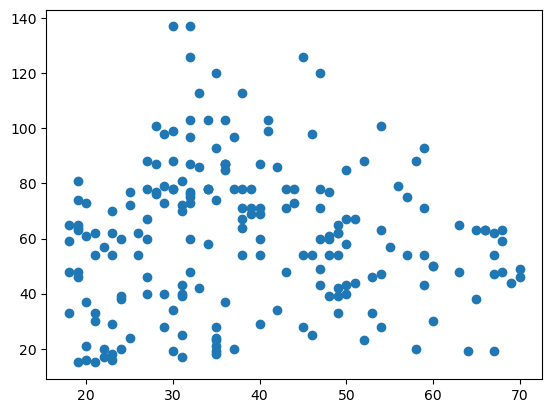

In [13]:
#viz
plt.scatter(df.age, df.income)

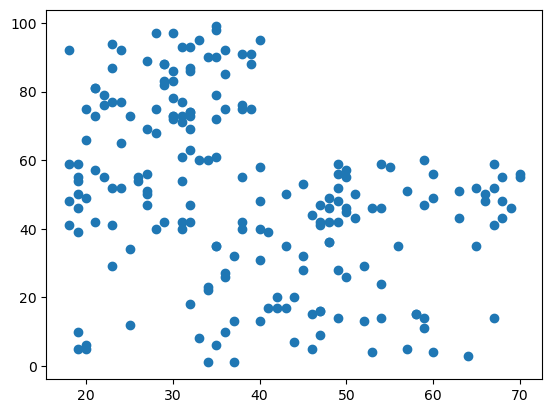

In [14]:
plt.scatter(df.age, df.score)

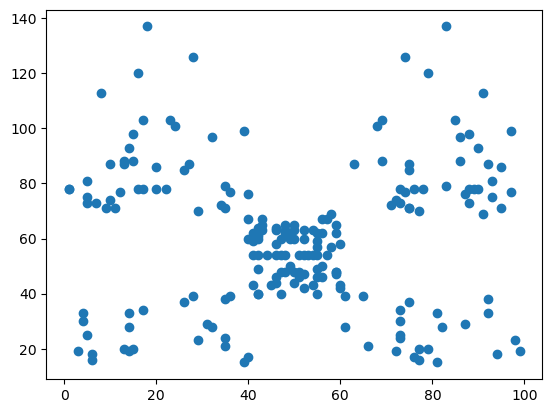

In [15]:
plt.scatter(df.score, df.income)

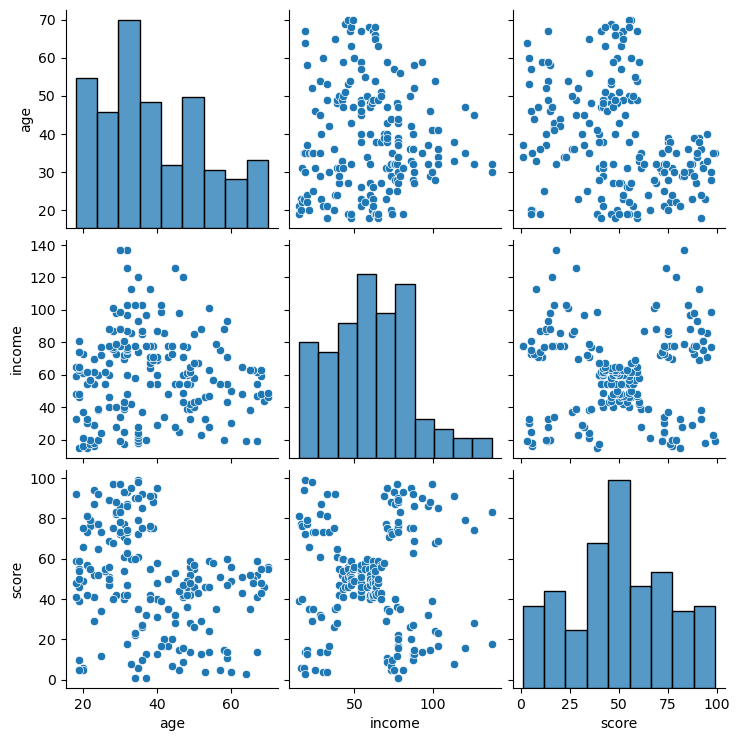

In [17]:
#pairplot
seaborn.pairplot(df[['age', 'income', 'score']])

Text(0, 0.5, 'income')

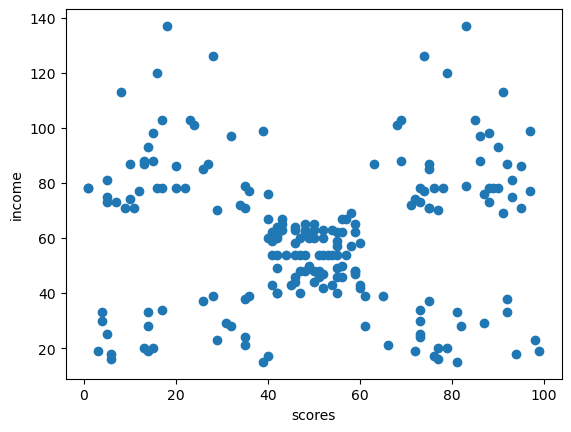

In [19]:
plt.scatter(df.score, df.income)
plt.xlabel('scores')
plt.ylabel('income')

# kmeans

In [21]:
import sklearn.cluster as cluster

In [22]:
kmeans = cluster.KMeans() #n_clusters=8

In [24]:
predicted = kmeans.fit_predict(df[['income','score']])
predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 0, 0, 0, 0,
       0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 2, 7, 2, 1, 2, 1, 2,
       7, 2, 1, 2, 1, 2, 1, 2, 1, 2, 7, 2, 1, 2, 7, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 7, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5])

In [25]:
df['predicted'] = predicted
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [26]:
centers = kmeans.cluster_centers_
centers

array([[ 47.65909091,  51.61363636],
       [ 80.18181818,  12.68181818],
       [ 78.03571429,  81.89285714],
       [ 25.72727273,  20.22727273],
       [ 25.0952381 ,  80.04761905],
       [108.18181818,  82.72727273],
       [109.7       ,  22.        ],
       [ 63.95238095,  46.21428571]])

# viz

In [27]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]
df5 = df[df.predicted == 5]
df6 = df[df.predicted == 6]
df7 = df[df.predicted == 7]

In [31]:
df0.head()

,Gender,age,income,score,predicted
42,Male,48,39,36,0
43,Female,31,39,61,0
45,Female,24,39,65,0
46,Female,50,40,55,0
47,Female,27,40,47,0


In [32]:
df0.shape

(44, 5)

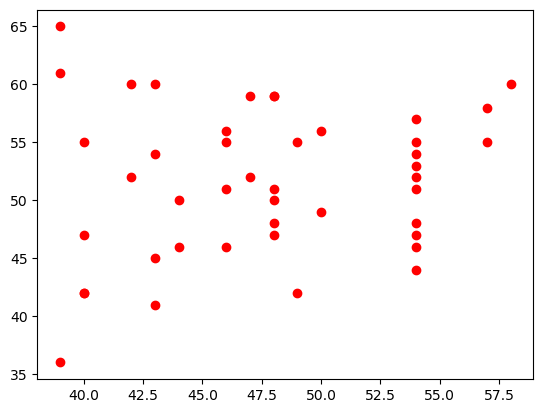

In [33]:
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')

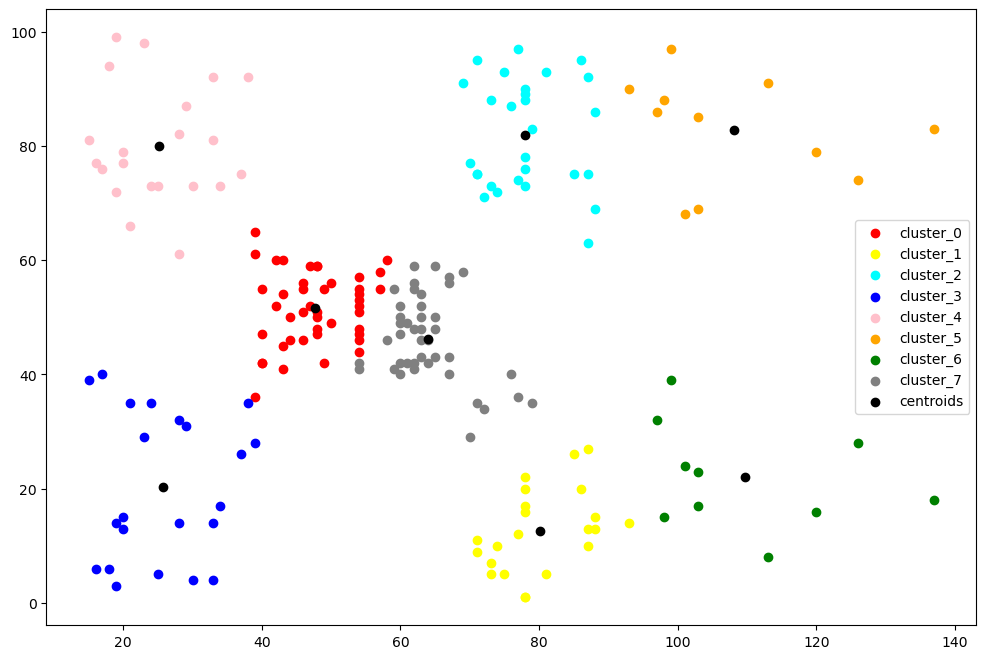

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')
plt.scatter(df1.income , df1.score, color='yellow', label='cluster_1')
plt.scatter(df2.income , df2.score, color='cyan', label='cluster_2')
plt.scatter(df3.income , df3.score, color='blue', label='cluster_3')
plt.scatter(df4.income , df4.score, color='pink', label='cluster_4')
plt.scatter(df5.income , df5.score, color='orange', label='cluster_5')
plt.scatter(df6.income , df6.score, color='green', label='cluster_6')
plt.scatter(df7.income , df7.score, color='gray', label='cluster_7')

plt.scatter(centers[:,0], centers[:,1], color='black', label='centroids')

plt.legend()

# Elbow Method

In [45]:
wcss = []
clstr = range(1,20)

for k in clstr:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score', 'income']])
    wcss.append(km.inertia_) #sum of squared distance

C:\Users\rashe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
wcss

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25062.433792653777,
 21797.08494464637,
 19669.710998301216,
 17701.54655549129,
 16035.660259939756,
 14464.52441483248,
 12882.609714044824,
 11968.938877119048,
 11028.444980644046,
 10148.288206092153,
 9322.65380084683,
 8616.766538604901]

Text(0.5, 0, 'Num of Clusters')

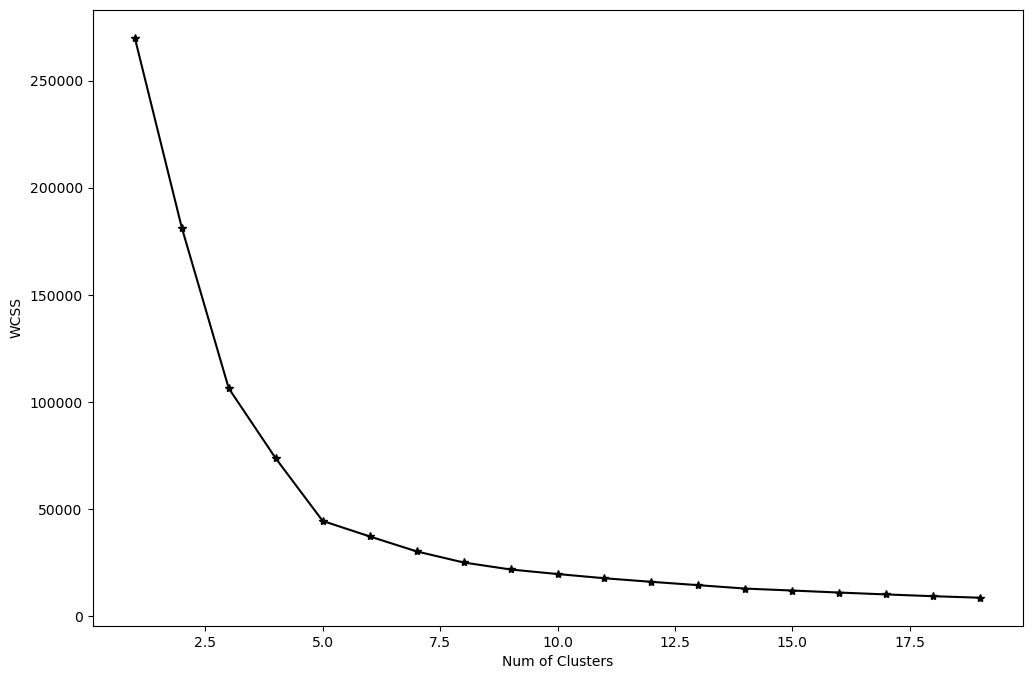

In [54]:
plt.figure(figsize=(12,8))
plt.plot(clstr, wcss, marker='*', color='black')
plt.ylabel('WCSS')
plt.xlabel('Num of Clusters')

In [58]:
#plot knee
from kneed import KneeLocator
kn = KneeLocator(clstr, wcss, curve='convex',direction='decreasing')

In [59]:
kn

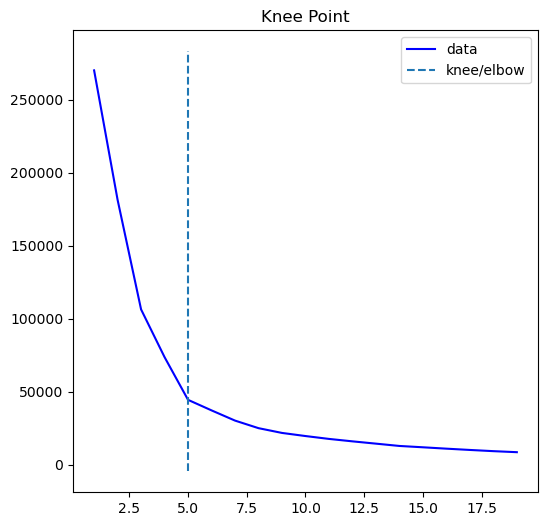

In [60]:
kn.plot_knee()

In [61]:
kn.knee

5

# After Elbow

In [62]:
kmeans2 = cluster.KMeans(n_clusters=5) 
predicted = kmeans2.fit_predict(df[['income','score']])
df['predicted'] = predicted
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


In [63]:
centers2 = kmeans2.cluster_centers_

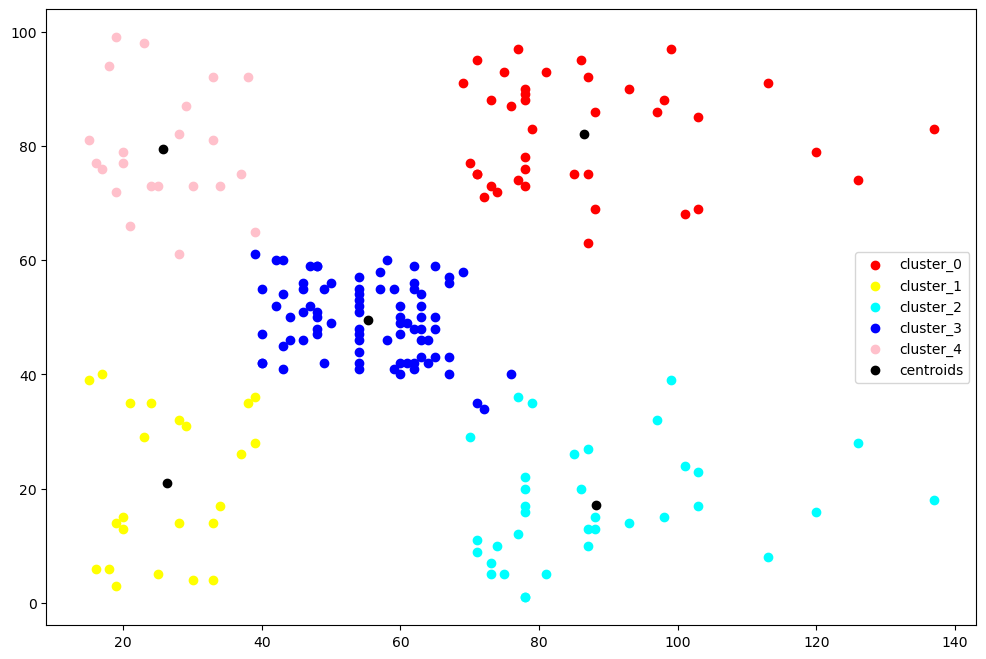

In [64]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]

plt.figure(figsize=(12,8))
plt.scatter(df0.income , df0.score, color='red', label='cluster_0')
plt.scatter(df1.income , df1.score, color='yellow', label='cluster_1')
plt.scatter(df2.income , df2.score, color='cyan', label='cluster_2')
plt.scatter(df3.income , df3.score, color='blue', label='cluster_3')
plt.scatter(df4.income , df4.score, color='pink', label='cluster_4')

plt.scatter(centers2[:,0], centers2[:,1], color='black', label='centroids')

plt.legend()
